# Analytics of Observational Data

## Lab 1 - 2

Student name: Le Thi Thu Tra

Student ID: ITDSIU19058

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mat
from scipy import stats

print("Completely Done")

Completely Done


# Read Data

Climate Model Simulation Crashes

[Data Source](https://archive.ics.uci.edu/ml/datasets/climate+model+simulation+crashes)

**Objects:** study, run, outcome

**Attributes** (all atributes are in **numerical type**): vsonst_corr, vconst_2, vconst_3, vconst_4, vconst_5, vconst_7, ah_corr, ah_bolus, slm_corr, efficiency_factor, tidal_mix_max, vertical_decay_scale, convect_corr, bckgrnd_vdc1, bckgrnd_vdc_ban, bckgrnd_vdc_ban, bckgrnd_vdc_eq, bckgrnd_vdc_psim, Prandlt


In [ ]:
url = "https://raw.githubusercontent.com/lephanthutra/Failure-analysis-of-parameter-induced-simulation-crashes-in-climate-models/main/pop_failures.dat"
df = pd.read_csv(url, sep = '\s\s+|,', engine = 'python')
df

Study  Run  vconst_corr  vconst_2  vconst_3  vconst_4  vconst_5  \
0        1    1     0.859036  0.927825  0.252866  0.298838  0.170521   
1        1    2     0.606041  0.457728  0.359448  0.306957  0.843331   
2        1    3     0.997600  0.373238  0.517399  0.504993  0.618903   
3        1    4     0.783408  0.104055  0.197533  0.421837  0.742056   
4        1    5     0.406250  0.513199  0.061812  0.635837  0.844798   
..     ...  ...          ...       ...       ...       ...       ...   
535      3  176     0.657136  0.489375  0.133713  0.411950  0.087780   
536      3  177     0.915894  0.842720  0.518947  0.090622  0.336981   
537      3  178     0.478600  0.941185  0.769245  0.950776  0.189406   
538      3  179     0.007793  0.779287  0.867468  0.704820  0.983282   
539      3  180     0.608075  0.031556  0.598264  0.794771  0.145680   

     vconst_7   ah_corr  ah_bolus  ...  efficiency_factor  tidal_mix_max  \
0    0.735936  0.428325  0.567947  ...           0.245675       0.104226   
1    0.934851  0.444572  0.828015  ...           0.616870       0.975786   
2    0.605571  0.746225  0.195928  ...           0.679355       0.803413   
3    0.490828  0.005525  0.392123  ...           0.471463       0.597879   
4    0.441502  0.191926  0.487546  ...           0.551543       0.743877   
..        ...       ...       ...  ...                ...            ...   
535  0.356289  0.480204  0.029678  ...           0.280546       0.384117   
536  0.893576  0.978703  0.674868  ...           0.798108       0.353546   
537  0.112743  0.745645  0.527096  ...           0.193103       0.829563   
538  0.420303  0.710612  0.174746  ...           0.761134       0.436714   
539  0.378183  0.461948  0.425291  ...           0.480938       0.307816   

     vertical_decay_scale  convect_corr  bckgrnd_vdc1  bckgrnd_vdc_ban  \
0                0.869091      0.997518      0.448620         0.307522   
1                0.914344      0.845247      0.864152         0.346713   
2                0.643995      0.718441      0.924775         0.315371   
3                0.761659      0.362751      0.912819         0.977971   
4                0.312349      0.650223      0.522261         0.043545   
..                    ...           ...           ...              ...   
535              0.885948      0.768482      0.459479         0.334482   
536              0.044796      0.990900      0.347027         0.512499   
537              0.101506      0.548878      0.381966         0.198811   
538              0.690132      0.825133      0.981656         0.113193   
539              0.231638      0.464152      0.583558         0.969365   

     bckgrnd_vdc_eq  bckgrnd_vdc_psim   Prandtl  outcome  
0          0.858310          0.796997  0.869893        0  
1          0.356573          0.438447  0.512256        1  
2          0.250642          0.285636  0.365858        1  
3          0.845921          0.699431  0.475987        1  
4          0.376660          0.280098  0.132283        1  
..              ...               ...       ...      ...  
535        0.573002          0.610183  0.737706        1  
536        0.810549          0.593332  0.142565        0  
537        0.867108          0.461632  0.652817        1  
538        0.364799          0.201469  0.536535        1  
539        0.464331          0.760344  0.762439        1  

[540 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Study                 540 non-null    int64  
 1   Run                   540 non-null    int64  
 2   vconst_corr           540 non-null    float64
 3   vconst_2              540 non-null    float64
 4   vconst_3              540 non-null    float64
 5   vconst_4              540 non-null    float64
 6   vconst_5              540 non-null    float64
 7   vconst_7              540 non-null    float64
 8   ah_corr               540 non-null    float64
 9   ah_bolus              540 non-null    float64
 10  slm_corr              540 non-null    float64
 11  efficiency_factor     540 non-null    float64
 12  tidal_mix_max         540 non-null    float64
 13  vertical_decay_scale  540 non-null    float64
 14  convect_corr          540 non-null    float64
 15  bckgrnd_vdc1          5

# Boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


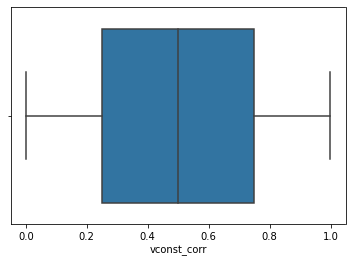

In [15]:
sns.boxplot(df['vconst_corr'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


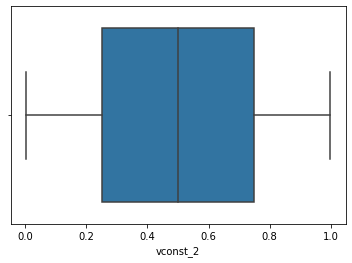

In [17]:
sns.boxplot(df['vconst_2'])

# Present five-number summaries

In [14]:
df.describe()

Study         Run  vconst_corr    vconst_2    vconst_3  \
count  540.000000  540.000000   540.000000  540.000000  540.000000   
mean     2.000000   90.500000     0.500026    0.500097    0.500027   
std      0.817254   52.008901     0.288939    0.288922    0.289067   
min      1.000000    1.000000     0.000414    0.001922    0.001181   
25%      1.000000   45.750000     0.249650    0.251597    0.251540   
50%      2.000000   90.500000     0.499998    0.499595    0.500104   
75%      3.000000  135.250000     0.750042    0.750011    0.749180   
max      3.000000  180.000000     0.999194    0.998815    0.998263   

         vconst_4    vconst_5    vconst_7     ah_corr    ah_bolus  ...  \
count  540.000000  540.000000  540.000000  540.000000  540.000000  ...   
mean     0.500119    0.500001    0.499913    0.500059    0.500076  ...   
std      0.288993    0.288827    0.288852    0.289010    0.288909  ...   
min      0.001972    0.000858    0.000476    0.004590    0.000296  ...   
25%      0.250158    0.250630    0.251325    0.253048    0.250402  ...   
50%      0.500456    0.500903    0.499174    0.499070    0.500074  ...   
75%      0.750348    0.748988    0.748166    0.750109    0.749091  ...   
max      0.997673    0.998944    0.997142    0.998930    0.998506  ...   

       efficiency_factor  tidal_mix_max  vertical_decay_scale  convect_corr  \
count         540.000000     540.000000            540.000000    540.000000   
mean            0.500111       0.499984              0.500032      0.499933   
std             0.288966       0.289127              0.289014      0.288822   
min             0.002015       0.000419              0.001188      0.001312   
25%             0.250758       0.251676              0.249669      0.249988   
50%             0.500393       0.500322              0.500151      0.500625   
75%             0.749447       0.749346              0.749164      0.749569   
max             0.999536       0.999942              0.997718      0.997518   

       bckgrnd_vdc1  bckgrnd_vdc_ban  bckgrnd_vdc_eq  bckgrnd_vdc_psim  \
count    540.000000       540.000000      540.000000        540.000000   
mean       0.499944         0.499946        0.500044          0.500020   
std        0.288949         0.288923        0.288813          0.288936   
min        0.002509         0.000732        0.000891          0.000219   
25%        0.249586         0.249974        0.250412          0.252739   
50%        0.499080         0.499959        0.500384          0.498955   
75%        0.750012         0.747978        0.749256          0.748539   
max        0.999795         0.999155        0.997265          0.999306   

          Prandtl     outcome  
count  540.000000  540.000000  
mean     0.500021    0.914815  
std      0.289013    0.279416  
min      0.000263    0.000000  
25%      0.249723    1.000000  
50%      0.499431    1.000000  
75%      0.749792    1.000000  
max      0.999655    1.000000  

[8 rows x 21 columns]

# Draw distribution

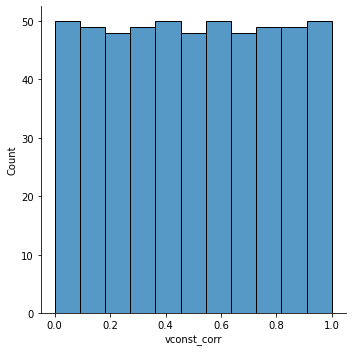

In [94]:
sns.displot(df['vconst_corr'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


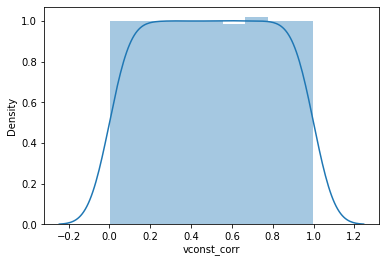

In [93]:
x = pd.Series(df['vconst_corr'], name="vconst_corr")
ax = sns.distplot(x, hist=True)

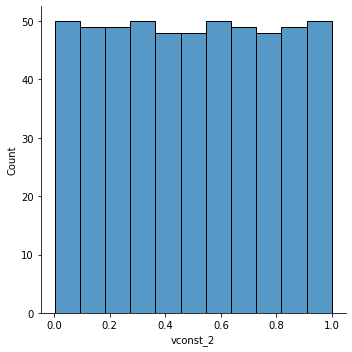

In [28]:
sns.displot(df['vconst_2'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


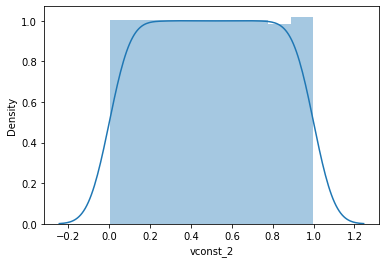

In [95]:
x = pd.Series(df['vconst_2'], name="vconst_2")
ax = sns.distplot(x, hist=True)

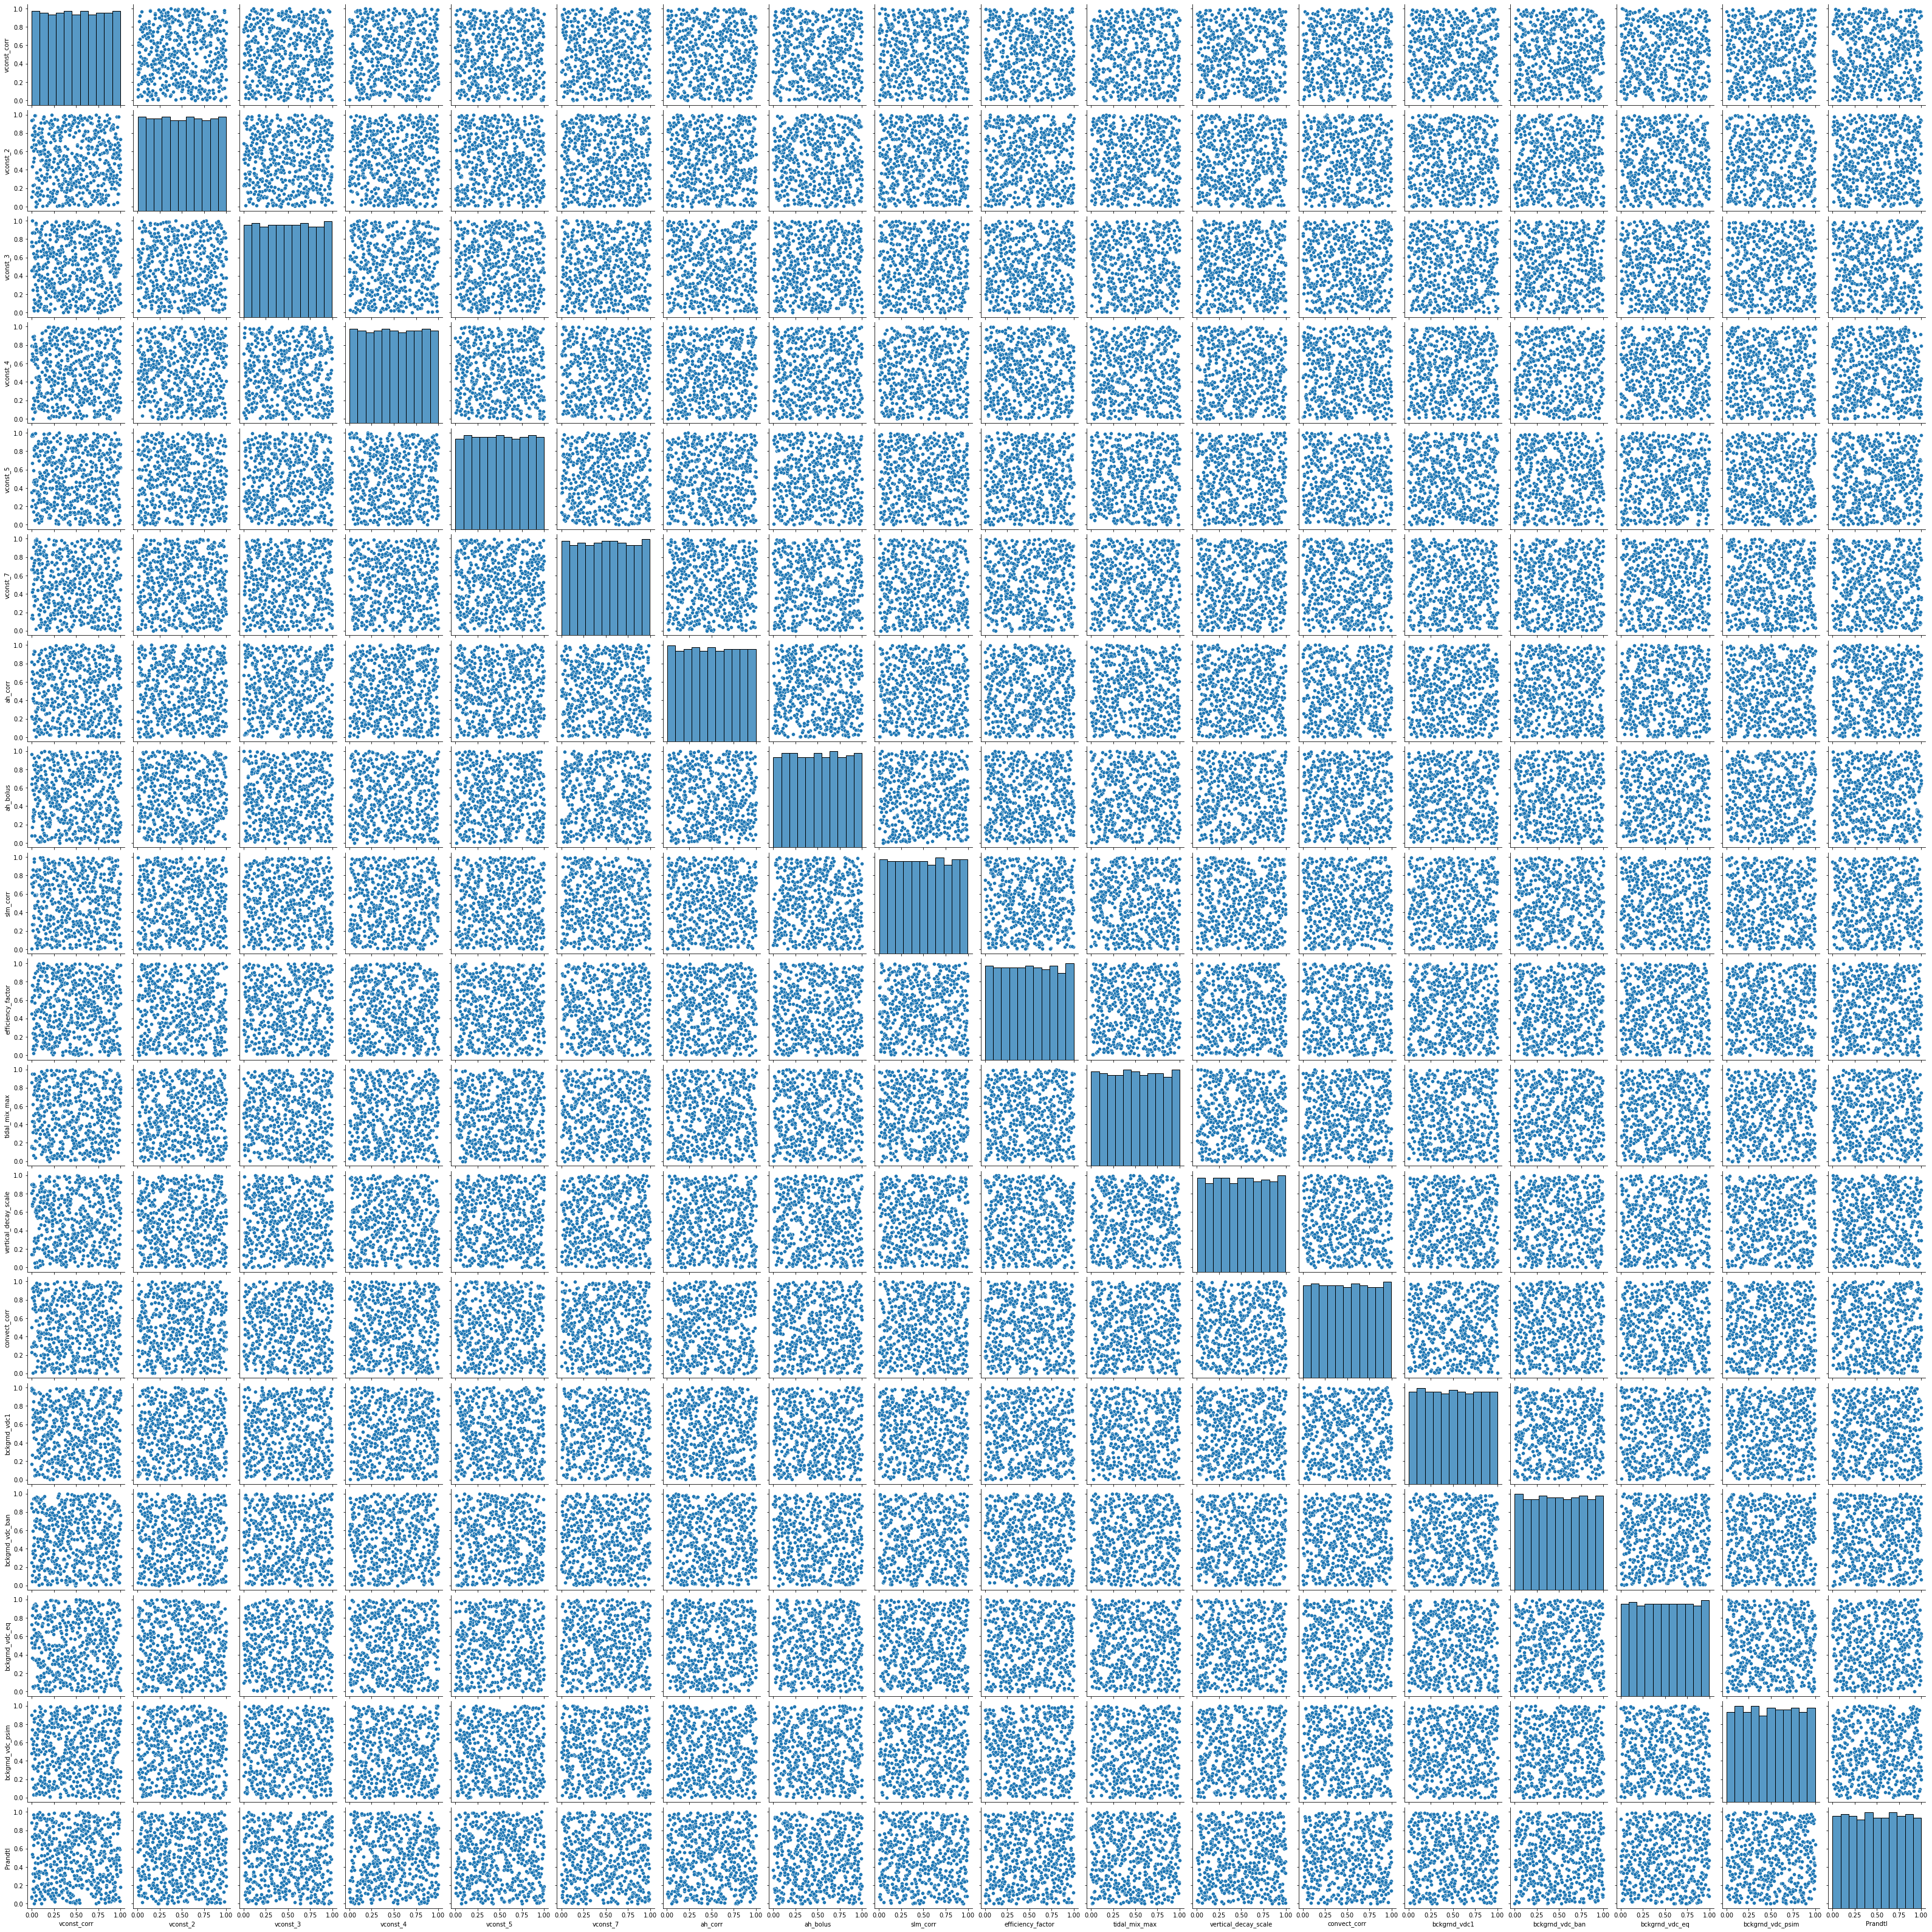

In [83]:
sns.pairplot(df.iloc[:, 2:20])

**The distribution shape of each attribute look nearly similar to Uniform PDF (Probability Density Function)**

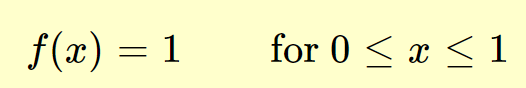

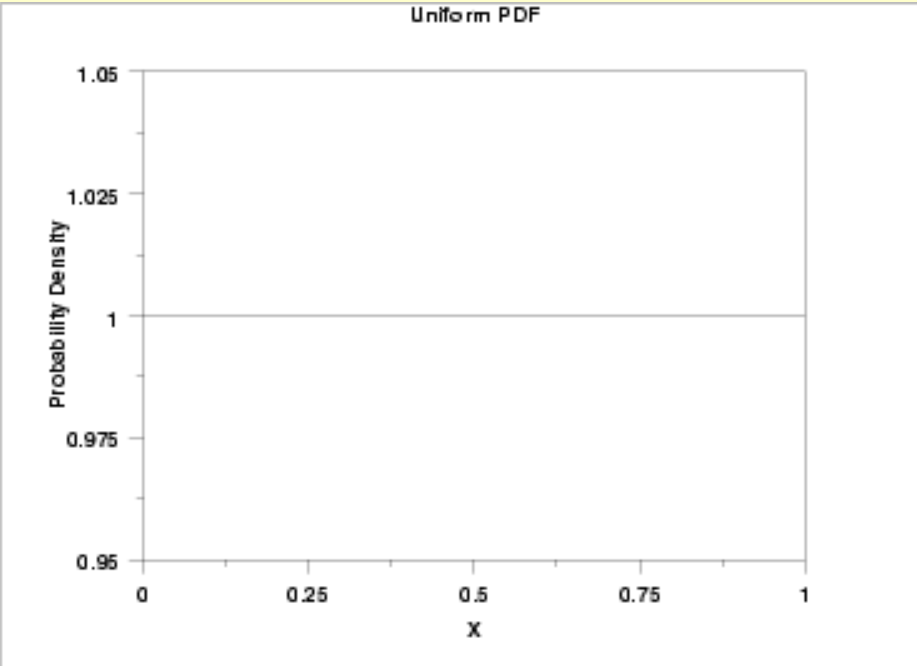

# Find the first and second moments and central moments of the random variables.

## vconst_corr

Moment

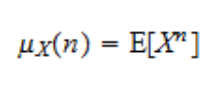

Central Moment

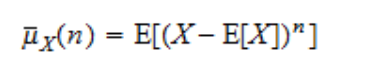

In [61]:
def calculateM1(df):
  moment1 = stats.moment(df, moment = 1)
  expected_value = df.mean()
  central_moment1 = expected_value - moment1
  print("1st Moment =", moment1)
  print("\n1st Central Moment:\n", central_moment1)

In [60]:
result1 = calculateM1(df.iloc[:, 2:20])

1st Moment = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

1st Central Moment:
 vconst_corr             0.500026
vconst_2                0.500097
vconst_3                0.500027
vconst_4                0.500119
vconst_5                0.500001
vconst_7                0.499913
ah_corr                 0.500059
ah_bolus                0.500076
slm_corr                0.500044
efficiency_factor       0.500111
tidal_mix_max           0.499984
vertical_decay_scale    0.500032
convect_corr            0.499933
bckgrnd_vdc1            0.499944
bckgrnd_vdc_ban         0.499946
bckgrnd_vdc_eq          0.500044
bckgrnd_vdc_psim        0.500020
Prandtl                 0.500021
dtype: float64


## vconst_2

In [96]:
def calculateM2(df):
  moment2 = stats.moment(df, moment = 2)
  expected_value = df.mean()
  central_moment2 = (expected_value - moment2)**2
  print("2nd Moment =", moment2)
  print("\n2nd Central Moment:\n", central_moment2)

In [97]:
result2 = calculateM2(df.iloc[:, 2:20])

2nd Moment = [0.08333114 0.08332147 0.08340489 0.0833623  0.08326633 0.08328116
 0.08337184 0.08331412 0.08328532 0.08334657 0.08343957 0.08337412
 0.08326342 0.08333669 0.08332199 0.0832587  0.08332946 0.08337389]

2nd Central Moment:
 vconst_corr             0.173635
vconst_2                0.173701
vconst_3                0.173574
vconst_4                0.173686
vconst_5                0.173668
vconst_7                0.173582
ah_corr                 0.173628
ah_bolus                0.173690
slm_corr                0.173688
efficiency_factor       0.173693
tidal_mix_max           0.173509
vertical_decay_scale    0.173604
convect_corr            0.173614
bckgrnd_vdc1            0.173561
bckgrnd_vdc_ban         0.173575
bckgrnd_vdc_eq          0.173710
bckgrnd_vdc_psim        0.173631
Prandtl                 0.173595
dtype: float64
